In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from pywt import wavedec

2023-10-11 16:21:06.839193: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-11 16:21:06.876012: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-11 16:21:06.876058: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-11 16:21:06.876085: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-11 16:21:06.882462: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-11 16:21:06.882814: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

## Preprocessing

In [4]:
csv_uri = '../Preprocessing/db2/data_MfccDwtRmsCqtdb2L4.csv'
df = pd.read_csv(csv_uri)
df

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,../data/DWT_NEW/MVP/New_MVP_062.wav,-6.415411,-49.763321,-6.948961,5.750439,17.332922,-14.663925,-17.589310,3.154269,14.120430,...,0.047319,0.041510,0.045158,0.032455,0.032257,0.023050,0.025213,0.043472,0.068516,MVP
1,../data/DWT_NEW/MVP/New_MVP_109.wav,14.946655,-70.398003,18.208736,4.084304,10.891194,-3.997966,-4.634422,-5.736940,5.029770,...,0.030851,0.041150,0.054054,0.061006,0.056136,0.047164,0.052843,0.079280,0.097683,MVP
2,../data/DWT_NEW/MVP/New_MVP_009.wav,-62.535320,-84.496635,-37.514645,10.294271,30.055582,-24.769781,-17.565136,7.351994,10.169067,...,0.024272,0.020906,0.016746,0.023154,0.024281,0.022005,0.028544,0.029068,0.037440,MVP
3,../data/DWT_NEW/MVP/New_MVP_177.wav,53.912571,-61.618771,8.788733,8.755916,1.873481,8.120923,-0.177020,1.190550,-5.058990,...,0.097058,0.108094,0.103610,0.101042,0.094665,0.138156,0.224876,0.274271,0.240900,MVP
4,../data/DWT_NEW/MVP/New_MVP_069.wav,-49.468113,-69.676414,-31.020966,-1.959181,41.045662,-22.202454,-18.499113,2.191724,16.005745,...,0.025927,0.025658,0.023807,0.016756,0.019152,0.016538,0.034406,0.053001,0.086312,MVP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,../data/DWT_NEW/AS/New_AS_171.wav,136.855499,-46.629486,-7.639011,-0.991349,-1.419255,-8.133327,-8.783477,-7.281703,5.170645,...,0.141685,0.128509,0.123811,0.117600,0.105368,0.077544,0.048332,0.036082,0.039695,AS
896,../data/DWT_NEW/AS/New_AS_067.wav,-69.019264,-131.111649,-44.408924,8.491607,1.504875,22.522787,-6.913439,-14.637901,-13.380872,...,0.010825,0.008915,0.013188,0.021493,0.042732,0.073560,0.120078,0.165537,0.214909,AS
897,../data/DWT_NEW/AS/New_AS_174.wav,139.968903,-57.605671,-2.239481,0.654734,0.233198,-7.046775,-7.054684,-4.001561,7.621564,...,0.126966,0.163914,0.183262,0.180518,0.149193,0.112418,0.126231,0.134249,0.116795,AS
898,../data/DWT_NEW/AS/New_AS_189.wav,-9.048059,-92.744507,-12.048640,17.588120,-12.278484,-9.919606,-5.442731,8.945140,3.789047,...,0.041015,0.044297,0.047834,0.035216,0.036538,0.041063,0.042515,0.050236,0.054879,AS


In [5]:
# scaler = StandardScaler()
X = df.drop(['label', 'filename'], axis=1)
y = df.iloc[:, -1]

In [6]:
X

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,...,cqt51,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60
0,-6.415411,-49.763321,-6.948961,5.750439,17.332922,-14.663925,-17.589310,3.154269,14.120430,-4.444699,...,0.061657,0.047319,0.041510,0.045158,0.032455,0.032257,0.023050,0.025213,0.043472,0.068516
1,14.946655,-70.398003,18.208736,4.084304,10.891194,-3.997966,-4.634422,-5.736940,5.029770,7.070004,...,0.022353,0.030851,0.041150,0.054054,0.061006,0.056136,0.047164,0.052843,0.079280,0.097683
2,-62.535320,-84.496635,-37.514645,10.294271,30.055582,-24.769781,-17.565136,7.351994,10.169067,-12.042663,...,0.023977,0.024272,0.020906,0.016746,0.023154,0.024281,0.022005,0.028544,0.029068,0.037440
3,53.912571,-61.618771,8.788733,8.755916,1.873481,8.120923,-0.177020,1.190550,-5.058990,0.099883,...,0.127350,0.097058,0.108094,0.103610,0.101042,0.094665,0.138156,0.224876,0.274271,0.240900
4,-49.468113,-69.676414,-31.020966,-1.959181,41.045662,-22.202454,-18.499113,2.191724,16.005745,-4.660654,...,0.024261,0.025927,0.025658,0.023807,0.016756,0.019152,0.016538,0.034406,0.053001,0.086312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,136.855499,-46.629486,-7.639011,-0.991349,-1.419255,-8.133327,-8.783477,-7.281703,5.170645,0.604295,...,0.172274,0.141685,0.128509,0.123811,0.117600,0.105368,0.077544,0.048332,0.036082,0.039695
896,-69.019264,-131.111649,-44.408924,8.491607,1.504875,22.522787,-6.913439,-14.637901,-13.380872,5.724308,...,0.012032,0.010825,0.008915,0.013188,0.021493,0.042732,0.073560,0.120078,0.165537,0.214909
897,139.968903,-57.605671,-2.239481,0.654734,0.233198,-7.046775,-7.054684,-4.001561,7.621564,4.157694,...,0.151611,0.126966,0.163914,0.183262,0.180518,0.149193,0.112418,0.126231,0.134249,0.116795
898,-9.048059,-92.744507,-12.048640,17.588120,-12.278484,-9.919606,-5.442731,8.945140,3.789047,1.499654,...,0.032794,0.041015,0.044297,0.047834,0.035216,0.036538,0.041063,0.042515,0.050236,0.054879


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
lb = LabelEncoder()
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
print(y_test.shape)
y_test = tf.keras.utils.to_categorical(lb.fit_transform(y_test))
y_train = tf.keras.utils.to_categorical(lb.fit_transform(y_train))
print(X_train.shape)
print(X_test.shape)

(180,)
(720, 101, 1)
(180, 101, 1)


In [9]:
X_train.shape[2], y.shape

(1, (900,))

In [55]:
# X_train, y_train = X[:1000], y[:1000]
# X_test, y_test = X[1000:], y[1000:]

In [13]:
# LSTM tensorflow
model = tf.keras.Sequential([
    # tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True),
    # tf.keras.layers.Dense(32,activation='relu'),

    # tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dense(32, activation='relu'),

    # tf.keras.layers.Dense(5, activation='softmax')
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True),
    tf.keras.layers.Dense(32,activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.Dense(32, activation='relu', activity_regularizer=tf.keras.regularizers.l2(1e-4)),


    tf.keras.layers.Dense(5, activation='softmax')
])

optimazer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimazer, loss='categorical_crossentropy', metrics=['acc'])

# history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
45/45 [==============================] - 3s 32ms/step - loss: 1.5315 - acc: 0.4111 - val_loss: 1.4392 - val_acc: 0.4833
Epoch 2/50
45/45 [==============================] - 1s 21ms/step - loss: 1.3181 - acc: 0.5458 - val_loss: 1.2112 - val_acc: 0.5333
Epoch 3/50
45/45 [==============================] - 1s 21ms/step - loss: 1.0832 - acc: 0.6097 - val_loss: 1.0025 - val_acc: 0.6778
Epoch 4/50
45/45 [==============================] - 1s 21ms/step - loss: 0.8889 - acc: 0.7500 - val_loss: 0.8220 - val_acc: 0.7833
Epoch 5/50
45/45 [==============================] - 1s 21ms/step - loss: 0.7339 - acc: 0.8000 - val_loss: 0.6923 - val_acc: 0.8111
Epoch 6/50
45/45 [==============================] - 1s 22ms/step - loss: 0.6061 - acc: 0.8375 - val_loss: 0.6011 - val_acc: 0.8500
Epoch 7/50
45/45 [==============================] - 1s 22ms/step - loss: 0.5299 - acc: 0.8667 - val_loss: 0.5769 - val_acc: 0.8056
Epoch 8/50
45/45 [==============================] - 1s 21ms/step - loss: 0.4758 - a

In [14]:
# model.save('../modelh5/model_lstm_tuning.h5')

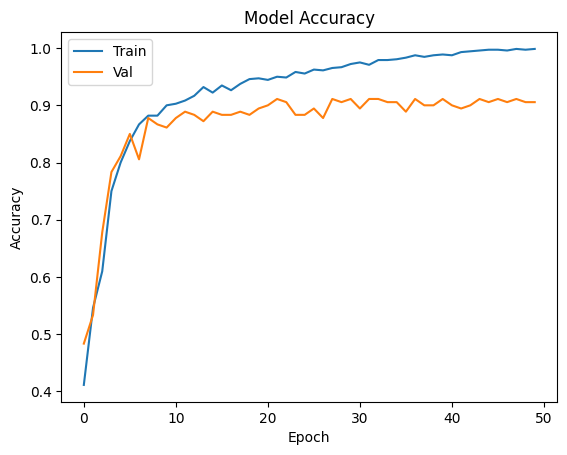

In [15]:
# plot
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [58]:
test_error, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy on test set is: {}".format(test_accuracy))

6/6 [==============================] - 0s 15ms/step - loss: 0.3721 - acc: 0.8722
Accuracy on test set is: 0.8722222447395325


In [59]:
X_test

array([[[-1.47106171e+02],
        [-1.43551010e+02],
        [ 2.13067322e+01],
        ...,
        [ 4.90130344e-03],
        [ 5.30469185e-03],
        [ 7.72853522e-03]],

       [[ 6.88923597e+00],
        [-9.81740112e+01],
        [ 3.10830250e+01],
        ...,
        [ 2.27524992e-02],
        [ 2.36069132e-02],
        [ 1.40987737e-02]],

       [[-1.16987244e+02],
        [-1.26666962e+02],
        [-4.07043228e+01],
        ...,
        [ 8.03079177e-03],
        [ 1.28592001e-02],
        [ 1.45316599e-02]],

       ...,

       [[ 3.46059151e+01],
        [-7.12273178e+01],
        [-4.46789742e+00],
        ...,
        [ 4.46055494e-02],
        [ 5.77341467e-02],
        [ 8.17568079e-02]],

       [[-8.05335903e+00],
        [-4.62489319e+01],
        [-4.96906805e+00],
        ...,
        [ 4.79840524e-02],
        [ 4.69750315e-02],
        [ 6.38005510e-02]],

       [[-3.37404275e+00],
        [-4.11002541e+01],
        [-3.30042648e+00],
        ...,
        

In [60]:
model.predict(X_test)

6/6 [==============================] - 0s 10ms/step


array([[2.09800317e-03, 1.14269787e-04, 1.00530984e-09, 9.97787774e-01,
        9.68002761e-12],
       [9.98584151e-01, 1.09873957e-03, 2.18154164e-05, 2.95090402e-04,
        2.60274959e-07],
       [3.32331744e-08, 2.46395619e-04, 9.99749899e-01, 2.14177612e-06,
        1.49314292e-06],
       [2.71119475e-01, 7.20336616e-01, 1.31151697e-04, 8.41282215e-03,
        8.56158089e-10],
       [7.57930393e-05, 1.44618948e-03, 2.74746359e-04, 9.97402668e-01,
        8.00699810e-04],
       [9.96765554e-01, 3.12386290e-03, 1.82463282e-05, 9.21801038e-05,
        2.21656257e-13],
       [1.44462712e-04, 1.86183737e-04, 9.99636769e-01, 3.22700653e-05,
        2.24323671e-07],
       [4.54991328e-04, 5.18606976e-04, 1.03612989e-03, 9.97415245e-01,
        5.74900245e-04],
       [5.75416610e-02, 3.16192806e-01, 1.68681145e-01, 4.57579345e-01,
        5.02149896e-06],
       [4.60360525e-03, 1.67844724e-02, 4.35660468e-06, 9.78604913e-01,
        2.53158942e-06],
       [8.12756116e-05, 2.6058

In [61]:

# confusion matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
y_pred = model.predict(X_test)
y_p = np.argmax(y_pred, axis=1)
y_t = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_t, y_p)
cm

1/6 [====>.........................] - ETA: 0s

6/6 [==============================] - 0s 10ms/step


array([[29,  5,  0,  1,  0],
       [ 2, 25,  1,  3,  0],
       [ 1,  5, 32,  0,  0],
       [ 2,  1,  0, 32,  0],
       [ 1,  1,  0,  0, 39]])

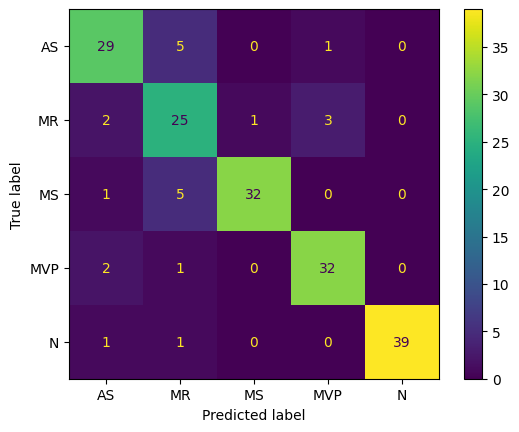

In [62]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['AS', 'MR', 'MS', 'MVP', 'N'])
disp.plot()
plt.show()

In [63]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

In [64]:
print(TNR)

[0.95862069 0.91946309 0.99295775 0.97241379 1.        ]


In [65]:
# classification_report
from sklearn.metrics import classification_report

print(classification_report(y_t, y_p))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.68      0.81      0.74        31
           2       0.97      0.84      0.90        38
           3       0.89      0.91      0.90        35
           4       1.00      0.95      0.97        41

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.88      0.87      0.88       180



In [66]:
# save h5
model_uri = '../modelh5/model_LSTM.h5'
model.save(model_uri)

/home/rafli/anaconda3/envs/tf/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [67]:
new_model = tf.keras.models.load_model(model_uri)
new_model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 101, 64)           16896     
                                                                 
 dense_41 (Dense)            (None, 101, 32)           2080      
                                                                 
 flatten_8 (Flatten)         (None, 3232)              0         
                                                                 
 dense_42 (Dense)            (None, 64)                206912    
                                                                 
 dense_43 (Dense)            (None, 32)                2080      
                                                                 
 dense_44 (Dense)            (None, 5)                 165       
                                                                 
Total params: 228133 (891.14 KB)
Trainable params: 22

In [68]:
import wave
import csv
import json
import librosa
header = 'filename'
for i in range(1, 41):
    header += f' mfcc{i}'
header += ' rms'
for i in range(1, 61):
  header += f' cqt{i}'
header += ' label'
header = header.split()

test_uri = "test.csv"

def extract_mfcc(audiofile):
    file = open(test_uri, 'w', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(header)
    y, sr = librosa.load(audiofile, mono=True, duration=3, sr=8000)
    coeffs = wavedec(y, 'db1', level=10)
    cA,cD10,cD9,cD8,cD7,cD6,cD5,cD4,cD3,cD2, cD1 = coeffs
    mfcc = librosa.feature.mfcc(y=cD1, sr=sr, n_mfcc=40, n_fft=2048, hop_length=512, n_mels=128)
    rms = librosa.feature.rms(y=cD1)[0]
    cqt = np.abs(librosa.cqt(y=cD1, sr=sr, n_bins=60)) 
    combined_features = np.concatenate((mfcc, rms.reshape(1, -1), cqt), axis=0)
    to_append = f'Signal'
    for e in combined_features:
        to_append += f' {np.mean(e.T, axis=0)}'
    file = open('test.csv', 'a', newline='')
    with file:
        writer = csv.writer(file)
        writer.writerow(to_append.split())

def predictCoba(audio):
    model = tf.keras.models.load_model(model_uri)
    extract_mfcc(audio)
    data = pd.read_csv(test_uri)
    df = data.drop(['label', 'filename'], axis=1)
    pred = model.predict(df)
    class_labels = ['AS', 'MR', 'MS', 'MVP', 'N']
    cek = np.argmax(pred[0])
    print(pred[0])
    print(cek)
    print(f'Predicted class: {class_labels[cek]}')


predictCoba('../data/training/N/New_N_114.wav')

1/1 [==============================] - 0s 463ms/step
[7.5405049e-01 1.0544424e-02 4.7361567e-03 2.3066893e-01 1.9732223e-11]
0
Predicted class: AS


In [69]:
data = pd.read_csv('test.csv')
data

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,cqt52,cqt53,cqt54,cqt55,cqt56,cqt57,cqt58,cqt59,cqt60,label
0,Signal,-461.970276,76.466766,8.232585,5.376007,3.355752,-14.712469,-14.283731,-11.86776,-7.578109,...,0.000997,0.001009,0.001038,0.001139,0.000566,0.000932,0.000775,0.000444,0.000473,NaN
